%%html
<style>
/* Aplica estilos a todas las imágenes en el notebook para centrarlas */
img {
    display: block;
    margin-left: auto;
    margin-right: auto;
}

/* Centra las figuras de matplotlib */
.figure {
    display: table;
    margin: auto;
}
</style>


<style>
  .custom-project-cs-hero {
    height: 100px;
    color: #fff;
    background: linear-gradient(to right, rgba(0, 98, 185, 0.8), rgba(0, 98, 185, 0.8));
    background-size: cover;
    background-position: center;
    position: relative;
  }
</style>
<div class="custom-project-cs-hero">
</div>


<div class="section">
    <h2 class="section-title">Introduction</h2>
    <p><strong>Natural Language Processing (NLP):</strong> Natural Language Processing is an interdisciplinary field that combines computer science, artificial intelligence, and linguistics. It is dedicated to the development of computational models for processing and comprehending natural language. These models are utilized for various tasks such as semantic word grouping, text-to-speech synthesis, and language translation.</p>
    <p><strong>Sentiment Analysis:</strong> Sentiment Analysis, also known as opinion mining, is a valuable practice in text analysis. It involves the interpretation and classification of emotions expressed in textual data. Organizations use Sentiment Analysis to gain insights into public sentiment regarding specific words or topics, which can inform their decision-making processes and strategies.</p>
    <p class="model-description">In the following sections, we will embark on the creation of a robust <strong>Sentiment Analysis model</strong>. This model will be designed to categorize tweets into either a <strong>Positive</strong> or <strong>Negative</strong> sentiment category, facilitating sentiment analysis for a range of applications.</p>
</div>

<div class="section">
    <h2 class="section-title">Table of Contents</h2>
    <ol>
        <li><a href="#p1">Importing dependencies</a></li>
        <li><a href="#p2">Importing dataset</a></li>
        <li><a href="#p3">Preprocessing Text</a></li>
        <li><a href="#p4">Analyzing data</a></li>
        <li><a href="#p5">Splitting data</a></li>
        <li><a href="#p6">TF-IDF Vectorizer</a></li>
        <li><a href="#p7">Transforming Dataset</a></li>
        <li><a href="#p8">Creating and Evaluating Models</a>
            <ul>
                <li><a href="#p8-1">BernoulliNB Model</a></li>
                <li><a href="#p8-2">LinearSVC Model</a></li>
                <li><a href="#p8-3">Logistic Regression Model</a></li>
            </ul>
        </li>
        <li><a href="#p9">Saving the Models</a></li>
        <li><a href="#p10">Using the Model</a></li>
    </ol>
</div>

<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}

.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}

.toc-list {
    list-style-type: none;
    padding-left: 0;
}

.toc-list li a {
    color: #0062B9;
    text-decoration: none;
    font-size: 18px;
}

.toc-list li a:hover {
    text-decoration: underline;
}

.model-description {
    font-style: italic;
    margin-top: 20px;
}
</style>

<div class="section">
<h2 class="section-title"><a name="p1"></a>Importing Dependencies</h2>
<p>Before diving into the analysis or modeling, the first crucial step is to import the necessary dependencies. These dependencies are external Python libraries that provide additional functionalities not available in the standard library. Importing them at the beginning of our script ensures that all the required tools are available and prevents runtime errors due to missing modules.</p>
</div>

<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}

.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}
</style>

In [5]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk
from nltk.stem import WordNetLemmatizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

<div class="section">
    <h2 class="section-title"><a name="p2"></a>Importing Dataset</h2>
    <p>The dataset utilized in this project is the renowned <strong>Sentiment140 dataset</strong>, comprising 1,600,000 tweets extracted via the <strong>Twitter API</strong>. Each tweet is annotated with a sentiment label (0 for Negative, 4 for Positive), offering a foundation for sentiment detection.</p>
    <p class="model-description">The categorization in the training data is derived from the emojis in the text, which might not always accurately represent the sentiment. Hence, models trained on this dataset could exhibit lower accuracy, as the categorization is not infallible.</p>
    <p>The dataset includes the following six fields:</p>
    <ul>
        <li><strong>sentiment</strong>: the polarity of the tweet (0 for negative, 4 for positive).</li>
        <li><strong>ids</strong>: The ID of the tweet (e.g., 2087).</li>
        <li><strong>date</strong>: The date of the tweet (e.g., Sat May 16 23:58:44 UTC 2009).</li>
        <li><strong>flag</strong>: The query (lyx). If no query, this value is NO_QUERY.</li>
        <li><strong>user</strong>: The user who tweeted (e.g., robotickilldozr).</li>
        <li><strong>text</strong>: The content of the tweet (e.g., Lyx is cool).</li>
    </ul>
    <p>For our purposes, only the <strong>sentiment</strong> and <strong>text</strong> fields are required, hence the other fields will be disregarded. Additionally, the <strong>sentiment</strong> field will be re-encoded to reflect sentiment more intuitively (0 for Negative, 1 for Positive).</p>
</div>

<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}

.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}

.model-description {
    font-style: italic;
    margin-top: 20px;
}
</style>


<Figure size 1000x600 with 0 Axes>

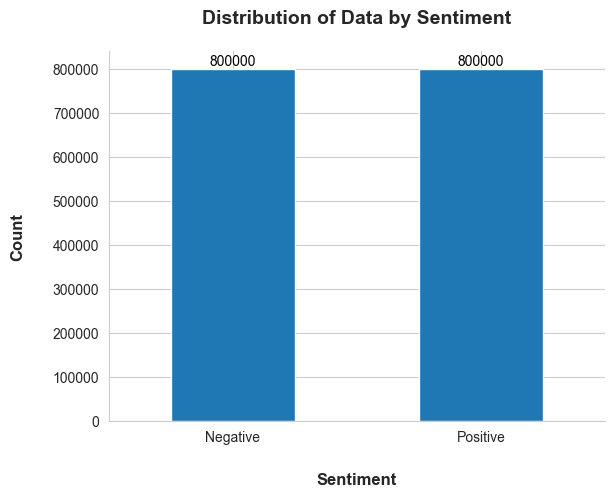

In [11]:
# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('data//training.1600000.processed.noemoticon.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

# Removing the unnecessary columns.
dataset = dataset[['sentiment','text']]
# Replacing the values to ease understanding.
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6), dpi=100)

ax = dataset.groupby('sentiment').count().plot(
    kind='bar',
    title='Distribution of Data',
    legend=False,
    color=['#1f77b4', '#ff7f0e'] 
)

ax.set_xticklabels(['Negative', 'Positive'], rotation=0)

ax.set_xlabel('Sentiment', labelpad=20, weight='bold', size=12)
ax.set_ylabel('Count', labelpad=20, weight='bold', size=12)
ax.set_title('Distribution of Data by Sentiment', pad=20, weight='bold', size=14)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

sns.despine()

plt.show()

# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])

<div class="section">
    <h2 class="section-title"><a name="p3"></a>Preprocess Text</h2>
    <p><strong>Text Preprocessing</strong> is traditionally an important step for <strong>Natural Language Processing (NLP)</strong> tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.</p>
    <p><strong>The Preprocessing steps taken are:</strong></p>
    <ol>
        <li><strong>Lower Casing:</strong> Each text is converted to lowercase.</li>
        <li><strong>Replacing URLs:</strong> Links starting with "http", "https", or "www" are replaced by "URL".</li>
        <li><strong>Replacing Emojis:</strong> Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (e.g., ":)" to "EMOJIsmile")</li>
        <li><strong>Replacing Usernames:</strong> Replace @Usernames with word "USER". (e.g., "@Kaggle" to "USER")</li>
        <li><strong>Removing Non-Alphabets:</strong> Replacing characters except Digits and Alphabets with a space.</li>
        <li><strong>Removing Consecutive letters:</strong> 3 or more consecutive letters are replaced by 2 letters. (e.g., "Heyyyy" to "Heyy")</li>
        <li><strong>Removing Short Words:</strong> Words with length less than 2 are removed.</li>
        <li><strong>Removing Stopwords:</strong> Stopwords are the English words which do not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (e.g., "the", "he", "have")</li>
        <li><strong>Lemmatizing:</strong> Lemmatization is the process of converting a word to its base form. (e.g., "running" to "run")</li>
    </ol>
    

</div>

<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}

.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}

/* Añade aquí cualquier otro estilo global que necesites */
</style>


In [7]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Defining set containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [8]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [12]:
import time
t = time.time()
processedtext = preprocess(text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 77 seconds


<div class="section">
    <h2 class="section-title"><a name="p4"></a>Analysing the Data</h2>
    <p>Now we're going to analyse the preprocessed data to gain insights into it. We'll visualize <strong>Word Clouds</strong> for <strong>Positive and Negative</strong> tweets from our dataset to discern the most frequent words.</p>
</div>

<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}

.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}

.subsection-title {
    color: #0062B9;
    margin-top: 20px;
    margin-bottom: 10px;
    font-size: 24px;
    text-align: center;
}

</style>


<div class="section">
    <h3 class="subsection-title">Word-Cloud for Negative tweets</h3>
</div>

<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}

.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}

.subsection-title {
    color: #0062B9;
    margin-top: 10px;
    margin-bottom: 10px;
    font-size: 24px;
    text-align: center;
}

</style>

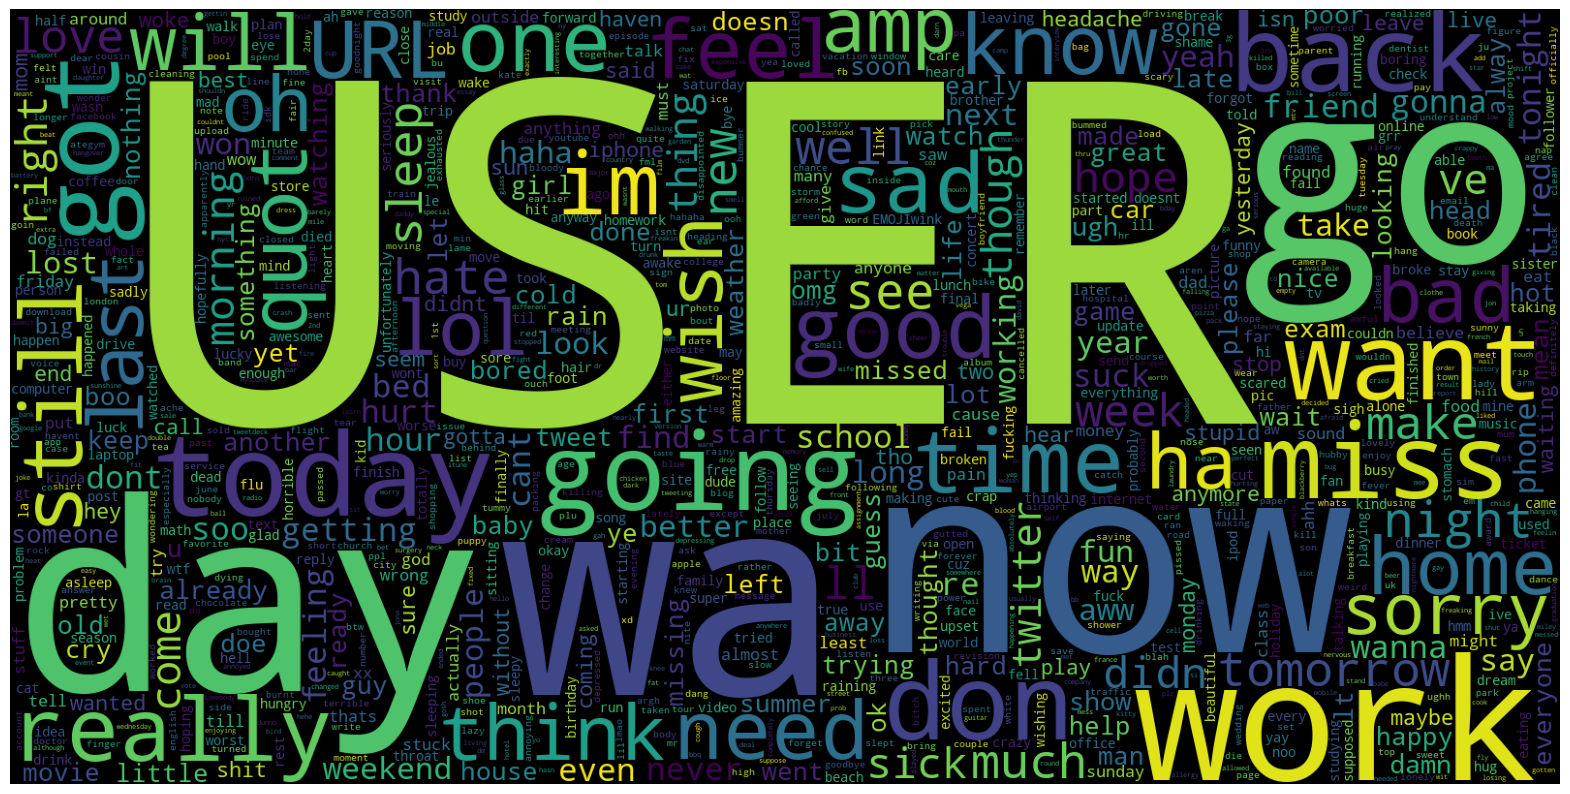

In [13]:
data_neg = processedtext[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis('off')
plt.grid(False)
plt.show()

<div class="section">
    <h3 class="subsection-title">Word-Cloud for Positive tweets</h3>
</div>

<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}

.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}

.subsection-title {
    color: #0062B9;
    margin-top: 10px;
    margin-bottom: 10px;
    font-size: 24px;
    text-align: center;
}

</style>

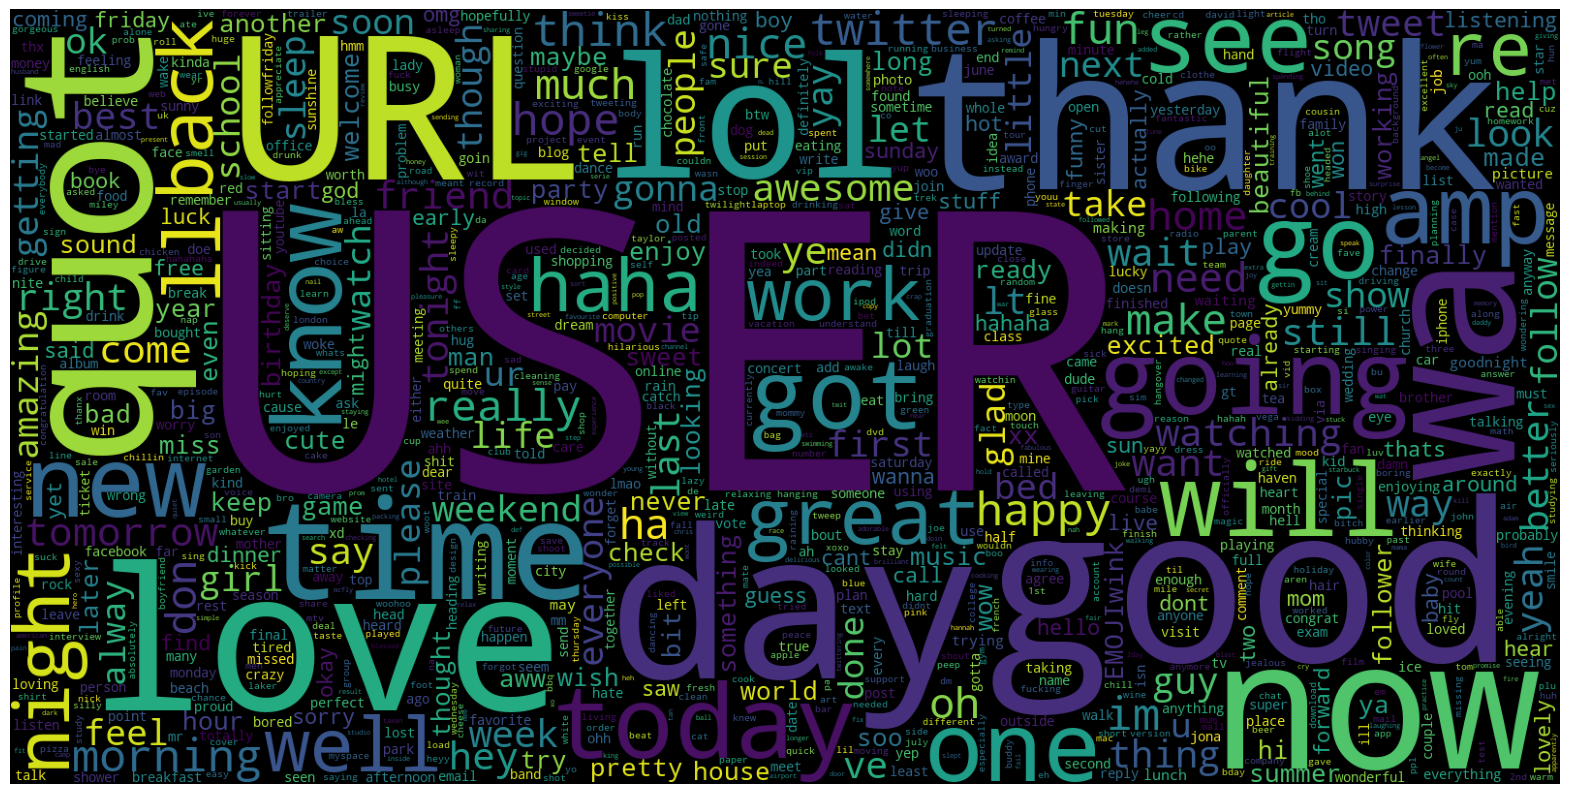

In [14]:
data_pos = processedtext[800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)
plt.axis('off')
plt.grid(False)
plt.show()

<div class="section">
    <h2 class="section-title"><a name="p5"></a>Splitting the Data</h2>
    <p>The Preprocessed Data is divided into two sets:</p>
    <ul>
        <li><strong>Training Data:</strong> The dataset upon which the model would be trained on. Contains 95% of the data.</li>
        <li><strong>Test Data:</strong> The dataset against which the model would be tested. Contains 5% of the data.</li>
    </ul>
</div>

<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}

.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}
</style>

In [15]:
X_train, X_test, y_train, y_test = train_test_split(processedtext, sentiment,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


<div class="section">
    <h2 class="section-title"><a name="p6"></a>TF-IDF Vectoriser</h2>
    <p><strong>TF-IDF (Term Frequency-Inverse Document Frequency)</strong> is a statistical measure used to evaluate the importance of a word in the context of a corpus of documents. It reflects how crucial a word is in understanding the essence of the documents.</p>
    <p>Consider an example where a collection of students' essays discusses 'Environmental Conservation.' In these essays, common words like 'the' might appear frequently, but they hold little unique information about the topic. In contrast, less frequent but topic-specific words like 'biodiversity,' 'ecosystem,' or 'conservation' offer much more insight into the theme of the essays. TF-IDF weighs these words more heavily, thus enhancing the thematic significance within the dataset.</p>
    <p>The <strong>TF-IDF Vectoriser</strong> transforms a collection of text documents into a matrix of TF-IDF features. This is crucial for algorithms that operate on numerical input rather than raw text. Typically, the vectoriser is trained on the training data (<strong>X_train</strong>) to capture the vocabulary and IDF of the corpus.</p>
    <p>The <strong>ngram_range</strong> parameter defines the range of word sequences considered. For instance, with an ngram_range of (1,2), the phrase 'climate change' would be treated as a single feature in addition to the individual words 'climate' and 'change'. This allows the model to capture context that single words may not convey.</p>
    <p>The <strong>max_features</strong> parameter limits the number of features to the most frequently occurring words, thus reducing dimensionality and potentially improving model performance. For example, if set to 1000, only the top 1000 words by frequency would be used as features.</p>
</div>

<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}

.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}
</style>

In [16]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

Vectoriser fitted.
No. of feature_words:  500000


<div class="section">
    <h2 class="section-title"><a name="p7"></a>Transforming the Dataset</h2>
    <p>Transforming the <strong>X_train</strong> and <strong>X_test</strong> datasets into matrices of <strong>TF-IDF Features</strong> using the <strong>TF-IDF Vectoriser</strong>. These datasets will be utilized to train the model and test its performance.</p>
</div>
<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}
.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}
</style>

In [17]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


<div class="section">
    <h2 class="section-title"><a name="p8"></a>Creating and Evaluating Models</h2>
    <p>We are crafting three distinct models for our sentiment analysis challenge:</p>
    <ul>
        <li><strong>Bernoulli Naive Bayes (BernoulliNB)</strong></li>
        <li><strong>Linear Support Vector Classification (LinearSVC)</strong></li>
        <li><strong>Logistic Regression (LR)</strong></li>
    </ul>
    <p>Given that our dataset is balanced with equal numbers of <strong>Positive and Negative</strong> predictions, we have selected <strong>Accuracy</strong> as our evaluation metric. Additionally, we are visualizing the <strong>Confusion Matrix</strong> to comprehend our model's performance across both classification categories.</p>
</div>
<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}
.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}
</style>

<div class="section">
    <h3 class="subsection-title">Evaluate Model Function</h3>
</div>

<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}

.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}

.subsection-title {
    color: #0062B9;
    margin-top: 10px;
    margin-bottom: 10px;
    font-size: 24px;
    text-align: center;
}

</style>


In [18]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

<div class="section">
    <h3 class="subsection-title"><a name="p8-1"></a>BernoulliNB</h3>
</div>

<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}

.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}

.subsection-title {
    color: #0062B9;
    margin-top: 10px;
    margin-bottom: 10px;
    font-size: 24px;
    text-align: center;
}

</style>

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     39989
           1       0.80      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



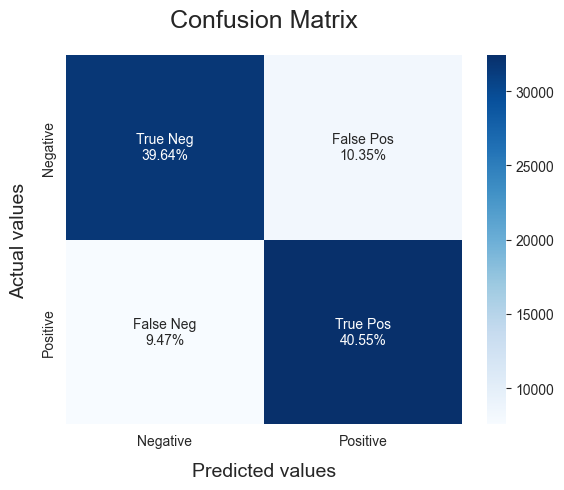

In [19]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)

<div class="section">
    <h3 class="subsection-title"><a name="p8-2"></a>LinearSVC</h3>
</div>

<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}

.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}

.subsection-title {
    color: #0062B9;
    margin-top: 10px;
    margin-bottom: 10px;
    font-size: 24px;
    text-align: center;
}

</style>

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     39989
           1       0.81      0.83      0.82     40011

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



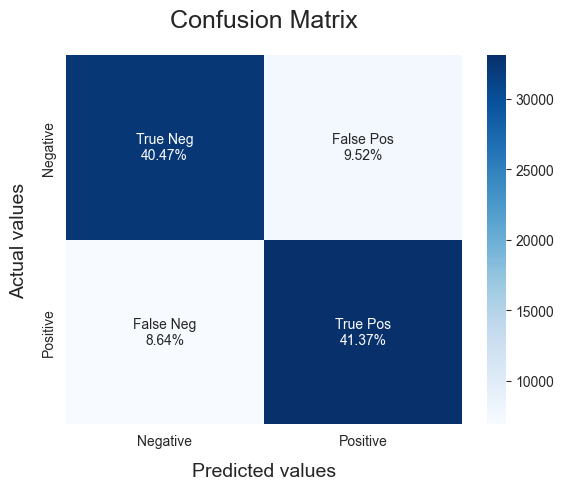

In [20]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

<div class="section">
    <h3 class="subsection-title"><a name="p8-3"></a>Logistic regresion model</h3>
</div>

<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}

.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}

.subsection-title {
    color: #0062B9;
    margin-top: 10px;
    margin-bottom: 10px;
    font-size: 24px;
    text-align: center;
}

</style>

              precision    recall  f1-score   support

           0       0.83      0.82      0.83     39989
           1       0.82      0.84      0.83     40011

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



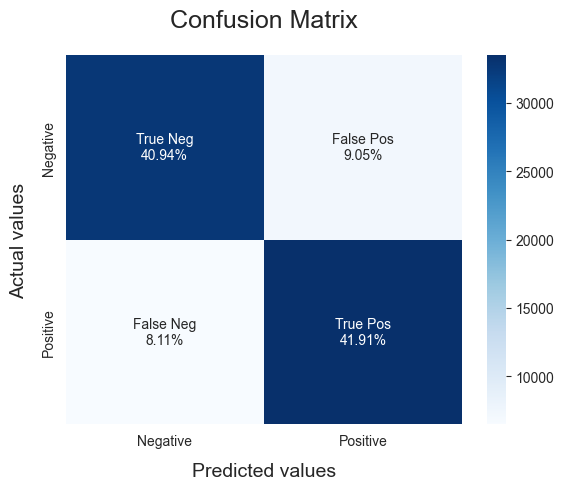

In [21]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)


<div class="section">
    <p>The <strong>Logistic Regression Model</strong> stands out as the most proficient, attaining nearly <strong>82% accuracy</strong> in sentiment classification of tweets. However, it's noteworthy that the <strong>BernoulliNB Model</strong> is the swiftest in terms of training and prediction, also achieving a commendable <strong>80% accuracy</strong>.</p>
</div>
<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}
.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}
</style>

<div class="section">
    <h2 class="section-title"><a name="p9"></a>Saving the Models</h2>
    <p>We're employing <strong>PICKLE</strong> to preserve the <strong>Vectoriser</strong> and <strong>BernoulliNB, Logistic Regression Model</strong> for subsequent utilization.</p>
</div>
<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}
.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}
</style>

In [22]:
file = open('vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

file = open('Sentiment-BNB.pickle','wb')
pickle.dump(BNBmodel, file)
file.close()

<div class="section">
    <h2 class="section-title"><a name="p10"></a>Using the Model</h2>
    <p>To deploy the model for <strong>Sentiment Prediction</strong>, we need to import the <strong>Vectoriser</strong> and <strong>LR Model</strong> using <strong>Pickle</strong>.</p>
    <p>The vectoriser can be harnessed to transform data into a matrix of TF-IDF Features, while the model can be applied to predict the sentiment of the transformed data. Nevertheless, the text intended for sentiment prediction must undergo preprocessing.</p>
</div>

<style>
.section {
    background-color: white;
    border: 1px solid #0062B9;
    padding: 20px;
    border-radius: 8px;
    color: #333;
    margin-bottom: 30px;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
}

.section-title {
    color: #0062B9;
    margin-bottom: 15px;
    text-align: center;
    font-size: 30px;
}
</style>

In [23]:
def load_models():
    '''
    Replace '..path/' by the path of the saved models.
    '''
    
    # Load the vectoriser.
    file = open('..path/vectoriser-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()
    # Load the LR Model.
    file = open('..path/Sentiment-LRv1.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()
    
    return vectoriser, LRmodel

def predict(vectoriser, model, text):
    # Predict the sentiment
    textdata = vectoriser.transform(preprocess(text))
    sentiment = model.predict(textdata)
    
    # Make a list of text with sentiment.
    data = []
    for text, pred in zip(text, sentiment):
        data.append((text,pred))
        
    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns = ['text','sentiment'])
    df = df.replace([0,1], ["Negative","Positive"])
    return df

if __name__=="__main__":
    # Loading the models.
    #vectoriser, LRmodel = load_models()
    
    # Text to classify should be in a list.
    text = ["I hate twitter",
            "May the Force be with you.",
            "Mr. Stark, I don't feel so good"]
    
    df = predict(vectoriser, LRmodel, text)
    print(df.head())

                              text sentiment
0                   I hate twitter  Negative
1       May the Force be with you.  Positive
2  Mr. Stark, I don't feel so good  Negative
